# <h1> Import dataset

In [21]:
# link dataset: https://data.cityofnewyork.us/Transportation/2020-Green-Taxi-Trip-Data/pkmi-4kfn
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
path="/content/drive/MyDrive/DS105/Do_An/"

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import samples

In [24]:
#loading dataset
df_step5=pd.read_csv(path+"dataset/finall_data.csv",index_col=False)

# <h1> 5. variable selection </h1>

In [25]:
con_col=list(df_step5.select_dtypes(["float64"]).columns)
con_col

['trip_distance',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'total_amount',
 'congestion_surcharge',
 'trip_duration']

In [26]:
cat_col=list(df_step5.select_dtypes(["int64"]).columns)
cat_col

['VendorID',
 'store_and_fwd_flag',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'passenger_count',
 'improvement_surcharge',
 'payment_type',
 'trip_type',
 'pickup_month',
 'pickup_weekday',
 'pickup_hour',
 'dropoff_month',
 'dropoff_weekday',
 'dropoff_hour']

## <h2> 5.1. ANOVA </h2>

In [27]:
import statsmodels.api as sm  
from statsmodels.formula.api import ols  

In [28]:
s_col=['PU_Borough','DO_Borough','PU_service_zone','DO_service_zone','pickup_bin_hours','dropoff_bin_hours']

In [29]:
df_step5.DO_Zone.value_counts()

East Harlem North         70240
Central Harlem North      66340
East Harlem South         57119
Central Harlem            55099
Morningside Heights       32652
                          ...  
New Dorp/Midland Beach       25
Great Kills                  16
Oakwood                      11
Rossville/Woodrow             9
Freshkills Park               6
Name: DO_Zone, Length: 259, dtype: int64

In [30]:
t=cat_col
t.extend(s_col)

In [31]:
col=[]
p=[]
x="tip_amount"
for y in t:
  string= x+ "~" + y
  mymod = ols(string, data = df_step5).fit()  
  aovtable = sm.stats.anova_lm(mymod, typ = 2)
  if aovtable['PR(>F)'][0] < 0.05:
    col.append(y)
    p.append(aovtable['PR(>F)'][0])

In [32]:
one_wayAnova=pd.DataFrame({'columns':col,'P_values':p})

In [33]:
one_wayAnova

,columns,P_values
0,VendorID,0.000000e+00
1,store_and_fwd_flag,1.092106e-65
2,RatecodeID,1.323152e-06
3,PULocationID,1.037538e-322
4,DOLocationID,0.000000e+00
5,passenger_count,8.283740e-04
6,improvement_surcharge,0.000000e+00
7,payment_type,0.000000e+00
8,trip_type,1.095849e-35
9,pickup_month,0.000000e+00


In [34]:
one_wayAnova['columns']

0                  VendorID
1        store_and_fwd_flag
2                RatecodeID
3              PULocationID
4              DOLocationID
5           passenger_count
6     improvement_surcharge
7              payment_type
8                 trip_type
9              pickup_month
10           pickup_weekday
11              pickup_hour
12            dropoff_month
13          dropoff_weekday
14             dropoff_hour
15               PU_Borough
16               DO_Borough
17          PU_service_zone
18          DO_service_zone
19         pickup_bin_hours
20        dropoff_bin_hours
Name: columns, dtype: object

In [35]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd


## <h2> 5.2 Pearson Correlation </h2>

In [42]:
from scipy import stats

In [47]:
col_5_2=[]
pear =[]
p_5_2=[]
x= "tip_amount"
for y in con_col:
  ps,pv=stats.pearsonr(df_step5[x],df_step5[y])
  if pv < 0.05:
    pear.append(ps)
    p_5_2.append(pv)
    col_5_2.append(y)


In [49]:
pearson=pd.DataFrame({'columns':col_5_2,'pearson':pear,'p_values':p_5_2})

In [50]:
pearson

,columns,pearson,p_values
0,trip_distance,0.006567,5.895743e-18
1,fare_amount,0.165033,0.000000e+00
2,extra,-0.126825,0.000000e+00
3,mta_tax,-0.051603,0.000000e+00
4,tip_amount,1.000000,0.000000e+00
5,tolls_amount,0.069716,0.000000e+00
6,total_amount,0.307294,0.000000e+00
7,congestion_surcharge,0.216905,0.000000e+00
8,trip_duration,0.022909,2.272837e-199


In [51]:
#tương quan giữa tip_amount với các biến liên tục có hệ số rất kém từ 0.3 trở xuống => ko ghi nhận

## <h2> 5.3 regplot và resiplot 

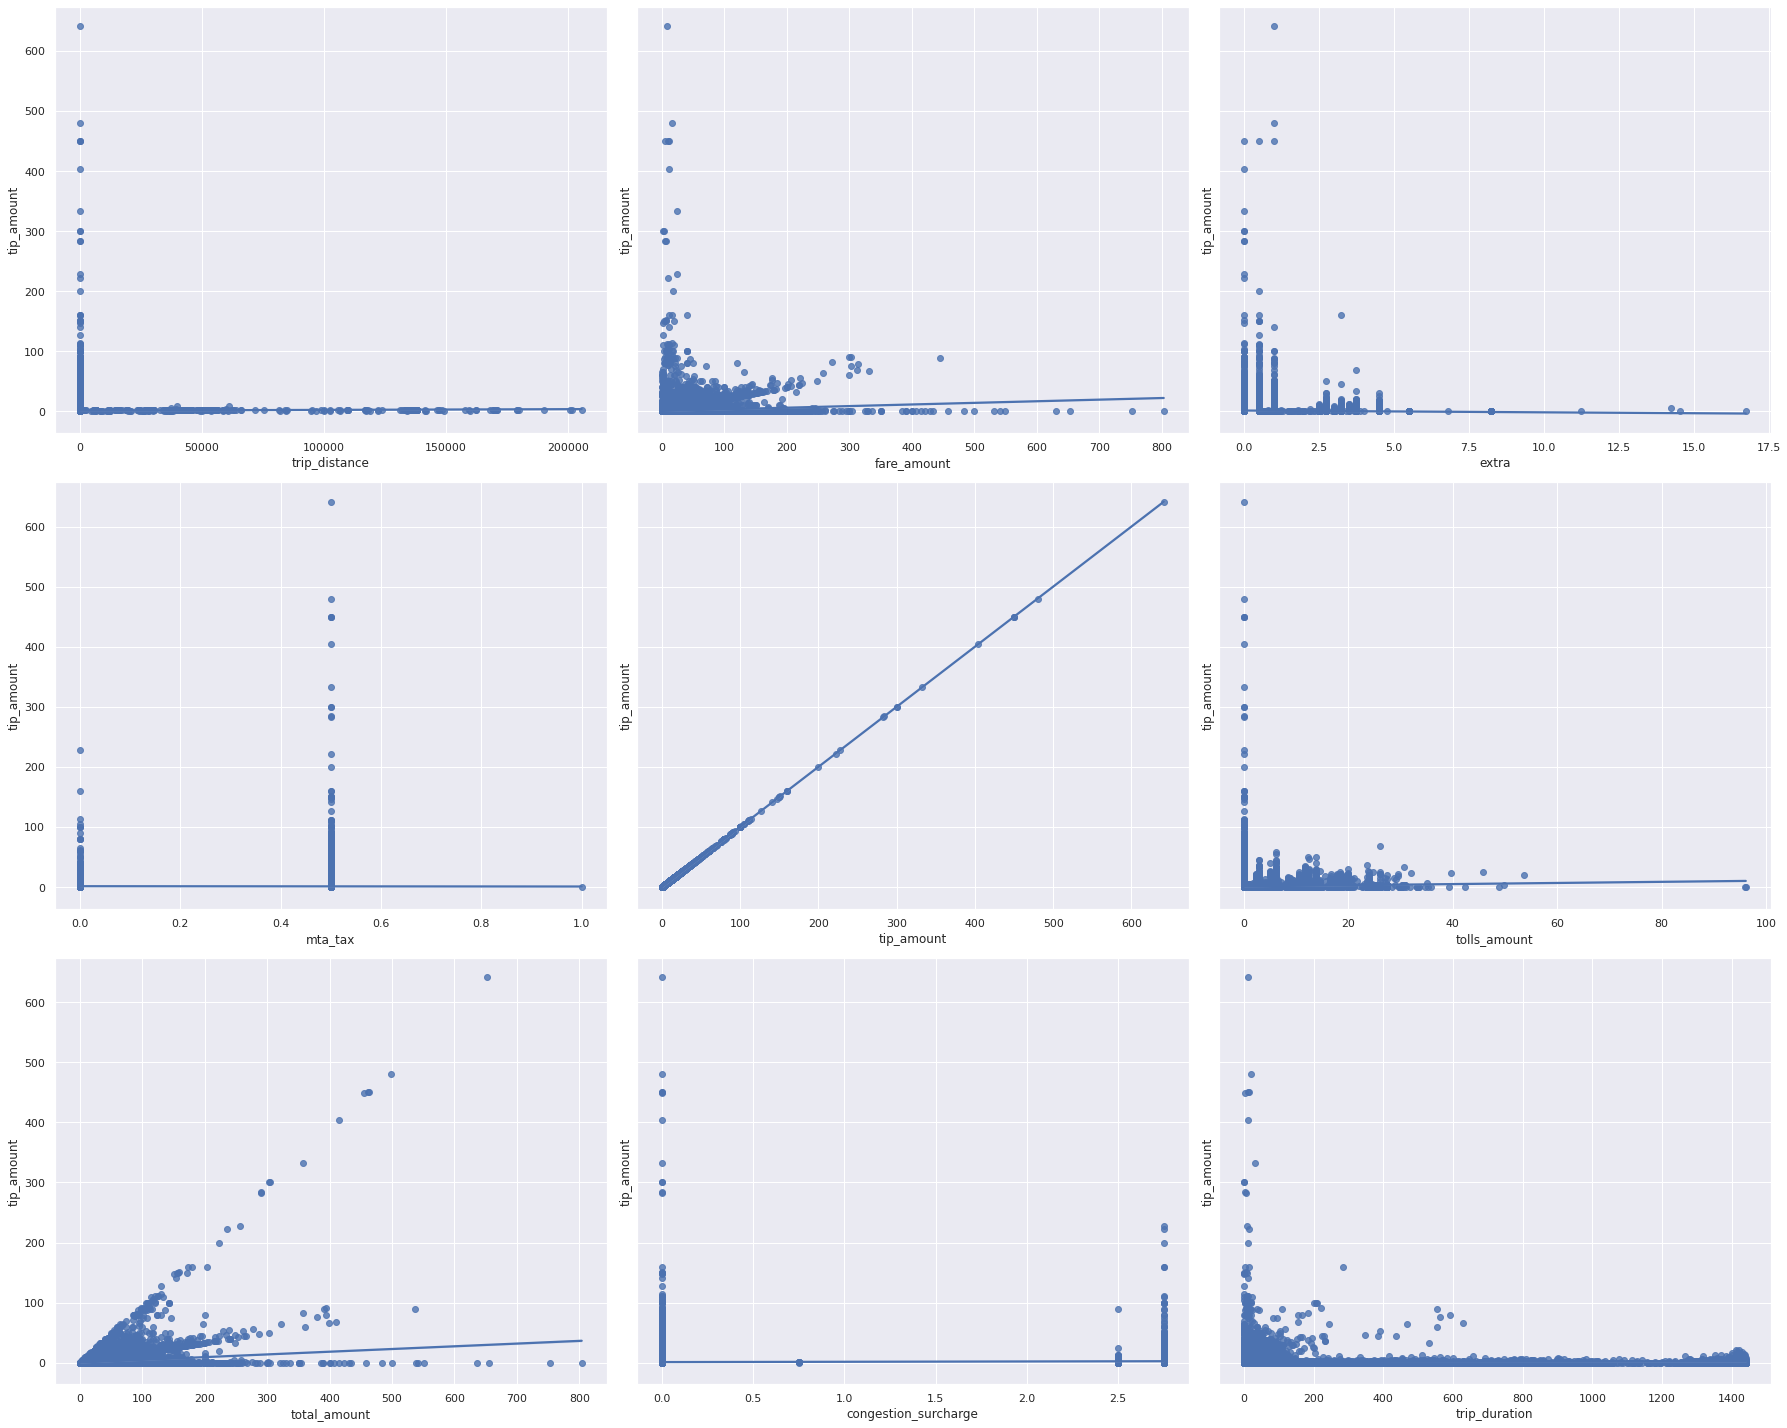

In [56]:
# x=con_col
# data=df_step5
# y="tip_amount"
# f,ax=plt.subplots(round(len(x)/3),3,figsize=(25,20),sharey=True)
# for i,a in zip(x,ax.flat):
#   sns.set(rc = {'figure.figsize':(20,10)})
#   p=sns.regplot(x=i,data=data,y=y,ax=a)
#   # p.set_ylim(0,64.12)
  
#   p.ticklabel_format(style='plain')
# plt.tight_layout()
# plt.show()
# f.savefig(path+'picture/regplot_continuous_variable_with '+y+ ' .png')

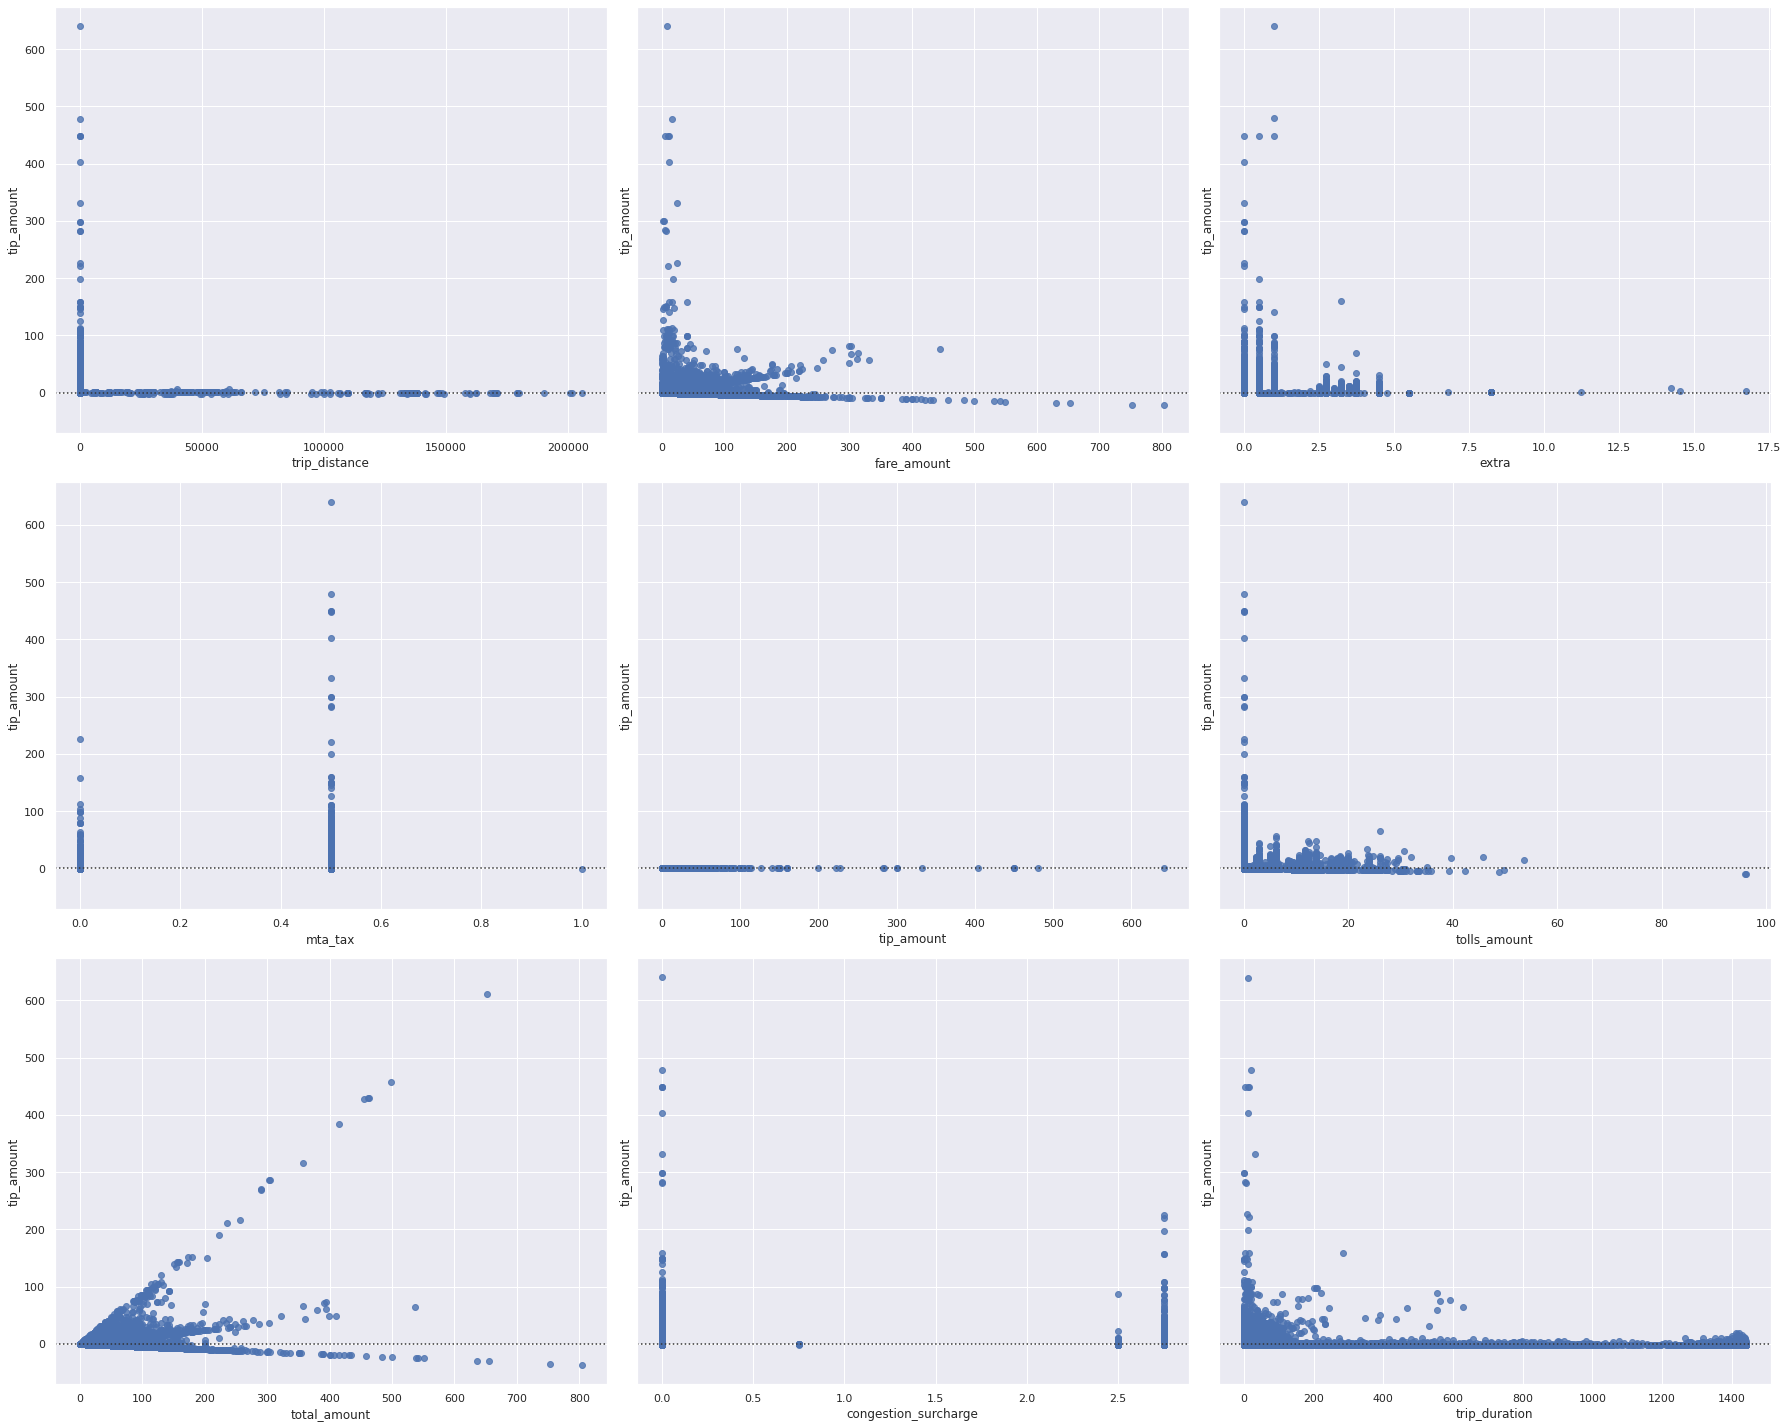

In [58]:
x=con_col
data=df_step5
y="tip_amount"
f,ax=plt.subplots(round(len(x)/3),3,figsize=(25,20),sharey=True)
for i,a in zip(x,ax.flat):
  sns.set(rc = {'figure.figsize':(20,10)})
  p=sns.residplot(x=i,data=data,y=y,ax=a)
  # p.set_ylim(0,64.12)
  
  p.ticklabel_format(style='plain')
plt.tight_layout()
plt.show()
f.savefig(path+'picture/residualplot_continuous_variable_with '+y+ ' .png')